## Decision Tree Basics - Iris Dataset  

Some basics with decision trees and the classic iris data set.  
Required: python kernel 2.7, sklearn, scikit, pydot

## Import Iris dataset

In [23]:
from sklearn import datasets
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [24]:
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [25]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Create decision tree model

In [26]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

# actually train (fit) the model
model = model.fit(X, y)

## Use model

Make a prediction with our new model

In [27]:
new_x = [ [1.2,  3.0,  5.4,  4.2], [1.2,  3.0,  5.4,  4.2] ]
model.predict(new_x)

array([2, 2])

## Create simpler tree
Look at feature importances

In [28]:
dataset.feature_names
model.feature_importances_

array([ 0.01333333,  0.01333333,  0.05072262,  0.92261071])

Keep only two most important features

In [29]:
X = dataset.data[:, [2, 3]]
model = tree.DecisionTreeClassifier(max_depth = 3)
model = model.fit(X, y)

## Save model as set of rules in json

In [30]:
def rules(clf, features, labels, node_index=0):
    """Structure of rules in a fit decision tree classifier

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A tree that has already been fit.

    features, labels : lists of str
        The names of the features and labels, respectively.

    """
    node = {}
    if clf.tree_.children_left[node_index] == -1:  # indicates leaf
        count_labels = zip(clf.tree_.value[node_index, 0], labels)
        node['name'] = ', '.join(('{} of {}'.format(int(count), label)
                                  for count, label in count_labels))
    else:
        feature = features[clf.tree_.feature[node_index]]
        threshold = clf.tree_.threshold[node_index]
        node['name'] = '{} > {}'.format(feature, threshold)
        left_index = clf.tree_.children_left[node_index]
        right_index = clf.tree_.children_right[node_index]
        node['children'] = [rules(clf, features, labels, right_index),
                            rules(clf, features, labels, left_index)]
    return node

In [31]:
r = rules(model, dataset.feature_names[2:], dataset.target_names)
r

{'children': [{'children': [{'children': [{'name': '0 of setosa, 0 of versicolor, 43 of virginica'},
      {'name': '0 of setosa, 1 of versicolor, 2 of virginica'}],
     'name': 'petal length (cm) > 4.85000038147'},
    {'children': [{'name': '0 of setosa, 2 of versicolor, 4 of virginica'},
      {'name': '0 of setosa, 47 of versicolor, 1 of virginica'}],
     'name': 'petal length (cm) > 4.94999980927'}],
   'name': 'petal width (cm) > 1.75'},
  {'name': '50 of setosa, 0 of versicolor, 0 of virginica'}],
 'name': 'petal length (cm) > 2.45000004768'}

Dump rules to file

In [32]:
import json
with open('rules.json', 'w') as f:
    f.write(json.dumps(r))

## Visualize tree

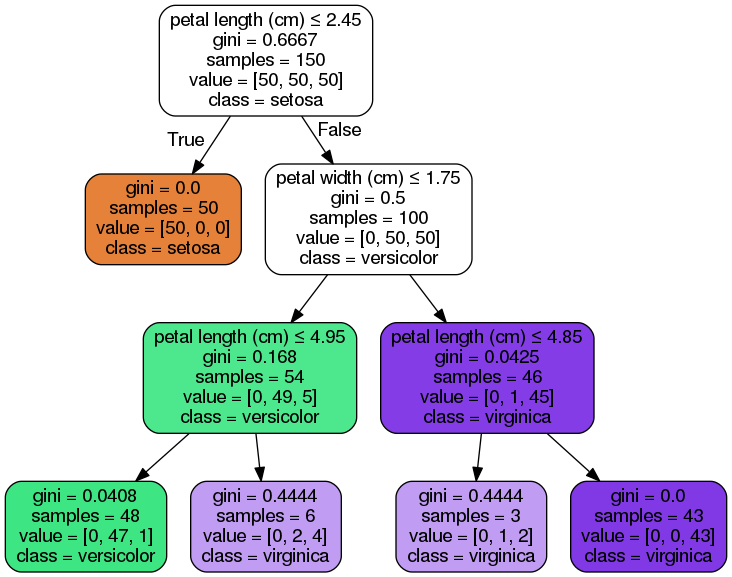

In [33]:
from sklearn.externals.six import StringIO
import pydot 
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=dataset.feature_names[2:],  
                         class_names=dataset.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  